In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
len(dir(pd)), len(dir(pd.DataFrame)), len(dir(pd.Series))

(140, 427, 425)

## IO
https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

In [6]:
iris = pd.read_csv('data/iris.csv')
iris.head() #n=5 by default

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#metadata
iris.columns, iris.index, iris.dtypes

(Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object'),
 RangeIndex(start=0, stop=150, step=1),
 SepalLength    float64
 SepalWidth     float64
 PetalLength    float64
 PetalWidth     float64
 Name            object
 dtype: object)

In [10]:
len(iris)

150

# Datatypes
https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes


https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-types

In [11]:
## Access
iris.SepalLength
#OR 
iris['SepalLength']  #Series
#Multicolumn
iris[['SepalLength','SepalWidth']] #DF

,SepalLength,SepalWidth
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [13]:
# Slice , loc - with ids, iloc- integer based
iris.loc[0:3, ['SepalLength', 'SepalWidth']] #Note 0:3 is rowid, inclusive

,SepalLength,SepalWidth
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1


In [14]:
iris.iloc[0:4, [0,1]] #0:4 like python- end exclusive

,SepalLength,SepalWidth
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1


In [15]:
iris.iloc[:,:]  #full DF

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
# Boolean accessing - only loc - and &, or | , not ~
iris.loc[iris.Name == 'Iris-virginica', :]
iris.loc[iris.Name == 'Iris-virginica', ['SepalLength', 'SepalWidth']]
iris.loc[(iris.Name == 'Iris-virginica') | (iris.Name == 'Iris-setosa'), ['SepalLength', 'SepalWidth']]

,SepalLength,SepalWidth
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [24]:
#Create new Col- use numpy methods - elementwise
iris['dummy'] = np.abs(iris.SepalLength - 2 * iris.SepalWidth + 1)
iris.dummy
#delete
iris.drop(columns=['dummy'], inplace=True)
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')

In [28]:
# methods
iris.Name.unique()
#if col is str, many str related methods are present
dir(iris.Name.str)
iris.Name.str.lower()
#for datetime- lets check later
iris.Name.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Name, dtype: int64

In [30]:
#DF methods are similar to Series
iris.sort_values(by=['Name', 'SepalLength'])

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
13,4.3,3.0,1.1,0.1,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
...,...,...,...,...,...
117,7.7,3.8,6.7,2.2,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica


In [32]:
# Axis 
iris.sum(axis=0) , iris.sum() #default by col

(SepalLength                                                876.5
 SepalWidth                                                 458.1
 PetalLength                                                563.8
 PetalWidth                                                 179.8
 Name           Iris-setosaIris-setosaIris-setosaIris-setosaIr...
 dtype: object,
 SepalLength                                                876.5
 SepalWidth                                                 458.1
 PetalLength                                                563.8
 PetalWidth                                                 179.8
 Name           Iris-setosaIris-setosaIris-setosaIris-setosaIr...
 dtype: object)

In [33]:
iris.sum(axis=1) #rowwise 

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    17.2
146    15.7
147    16.7
148    17.3
149    15.8
Length: 150, dtype: float64

In [34]:
# Aggregation
grp = iris.groupby('Name')
type(grp) , grp.mean() #DataFrameGroupBy

(pandas.core.groupby.generic.DataFrameGroupBy,
                  SepalLength  SepalWidth  PetalLength  PetalWidth
 Name                                                             
 Iris-setosa            5.006       3.418        1.464       0.244
 Iris-versicolor        5.936       2.770        4.260       1.326
 Iris-virginica         6.588       2.974        5.552       2.026)

In [38]:
grp.agg({'SepalLength': ['mean', 'count', 'max', np.sum]})
grp.agg({'SepalLength': ['mean', 'count', 'max', np.sum]}).to_csv("processed.csv")

In [39]:
# SQL
from sqlalchemy import create_engine
eng = create_engine("sqlite:///iris.db", echo=False)
iris.to_sql('iris', con=eng, if_exists='replace') #could be append

In [43]:
df_iris = pd.read_sql('iris', con=eng)
len(df_iris)
df_iris = pd.read_sql("select * from iris where Name='Iris-setosa'", con=eng)
len(df_iris)

50

In [42]:
eng.execute('select count(*) from iris').fetchall()

[(150,)]

# Plot
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html 

<AxesSubplot:>

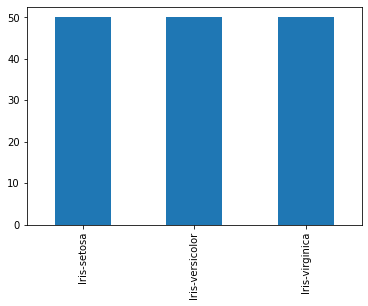

In [44]:
iris.Name.value_counts().plot(kind='bar')

<AxesSubplot:>

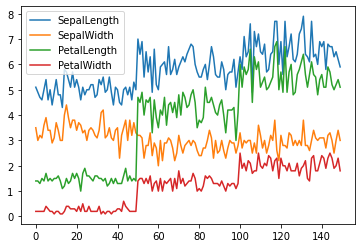

In [45]:
iris.iloc[:,0:4].plot(kind='line')

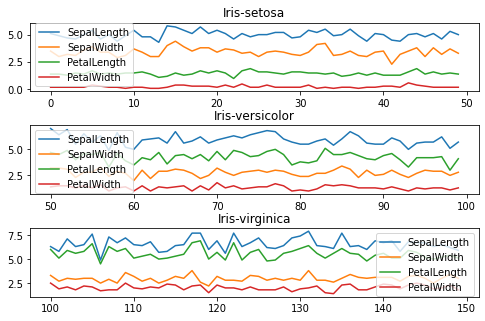

In [46]:
#but in same plot with Name as plot name
gp = iris.groupby('Name') 
plt.figure()
for i, (name, pdf) in enumerate(gp):
    # create subplot axes in a 3x1 grid
    ax = plt.subplot(3, 1, i + 1) # nrows, ncols, axes position
    # plot the continent on these axes
    pdf.plot(ax=ax)
    # set the title
    ax.set_title(name)
    # set the aspect
    # adjustable datalim ensure that the plots have the same axes size
    #ax.set_aspect('equal', adjustable='datalim')

plt.subplots_adjust(hspace=2)
plt.tight_layout(pad=-2)

## Time Series analysis

In [48]:
aq = pd.read_csv("air_quality_no2_long.csv")

In [49]:
aq = aq.rename(columns={"date.utc": "datetime"})
aq.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [50]:
#how many cities
aq.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [52]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
aq["datetime"] = pd.to_datetime(aq.datetime)
aq.dtypes

city                      object
country                   object
datetime     datetime64[ns, UTC]
location                  object
parameter                 object
value                    float64
unit                      object
dtype: object

In [53]:
len(dir(aq["datetime"].dt))

79

In [55]:
aq["datetime"].dt.month.unique()

array([6, 5], dtype=int64)

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [56]:
aq.datetime.max(), aq.datetime.min()

(Timestamp('2019-06-21 00:00:00+0000', tz='UTC'),
 Timestamp('2019-05-07 01:00:00+0000', tz='UTC'))

In [57]:
aq["month"] = aq["datetime"].dt.month

In [58]:
#group by
aq.groupby([aq["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

<AxesSubplot:xlabel='datetime'>

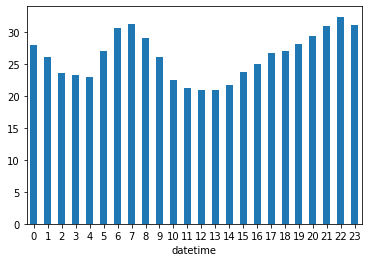

In [59]:
fig, axs = plt.subplots(1,1)
aq.groupby(aq["datetime"].dt.hour)["value"].mean().plot(kind="bar", rot=0, ax=axs)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html

In [62]:
no_2 = aq.pivot(index='datetime', columns="location", values="value")
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


In [63]:
no_2.index

DatetimeIndex(['2019-05-07 01:00:00+00:00', '2019-05-07 02:00:00+00:00',
               '2019-05-07 03:00:00+00:00', '2019-05-07 04:00:00+00:00',
               '2019-05-07 05:00:00+00:00', '2019-05-07 06:00:00+00:00',
               '2019-05-07 07:00:00+00:00', '2019-05-07 08:00:00+00:00',
               '2019-05-07 09:00:00+00:00', '2019-05-07 10:00:00+00:00',
               ...
               '2019-06-20 15:00:00+00:00', '2019-06-20 16:00:00+00:00',
               '2019-06-20 17:00:00+00:00', '2019-06-20 18:00:00+00:00',
               '2019-06-20 19:00:00+00:00', '2019-06-20 20:00:00+00:00',
               '2019-06-20 21:00:00+00:00', '2019-06-20 22:00:00+00:00',
               '2019-06-20 23:00:00+00:00', '2019-06-21 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=1033, freq=None)

In [66]:
#TS groupby == resample
monthly_max = no_2.resample('D').max() # M, Y ...
monthly_max.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 00:00:00+00:00,50.5,77.7,32.0
2019-05-08 00:00:00+00:00,23.0,48.9,40.0
2019-05-09 00:00:00+00:00,20.5,50.7,97.0
2019-05-10 00:00:00+00:00,11.5,60.7,52.0
2019-05-11 00:00:00+00:00,26.5,36.8,37.0


location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


In [70]:
pd.melt(no_2.reset_index(), id_vars=['datetime'], value_vars=['BETR801', 'FR04014','London Westminster'])

,datetime,location,value
0,2019-05-07 01:00:00+00:00,BETR801,50.5
1,2019-05-07 02:00:00+00:00,BETR801,45.0
2,2019-05-07 03:00:00+00:00,BETR801,NaN
3,2019-05-07 04:00:00+00:00,BETR801,NaN
4,2019-05-07 05:00:00+00:00,BETR801,NaN
...,...,...,...
3094,2019-06-20 20:00:00+00:00,London Westminster,NaN
3095,2019-06-20 21:00:00+00:00,London Westminster,NaN
3096,2019-06-20 22:00:00+00:00,London Westminster,NaN
3097,2019-06-20 23:00:00+00:00,London Westminster,NaN


In [71]:
# HandsOn
#2020-12-03 or infer_datetime_format=True, or '%d/%m/%Y' The strftime to parse time,
eng = create_engine("sqlite:///fake.db") 
df_fake_data = pd.read_sql("people",  con=eng)
df_fake_data.head()
df_fake_data.drop(columns=['id'], inplace=True)
df_fake_data['dob'] = pd.to_datetime(df_fake_data.dob, format='%Y-%m-%d')
df_fake_data['dob'].dt.year.head()

grp = df_fake_data.groupby('country')
grp = df_fake_data.loc[(df_fake_data['dob'].dt.year >= 1990) & (df_fake_data['dob'].dt.year< 1995), ['country', 'dob']].groupby('country')
grp.count().reset_index().values.tolist()

[['Afghanistan', 2],
 ['American Samoa', 1],
 ['Andorra', 1],
 ['Anguilla', 1],
 ['Aruba', 1],
 ['Bahamas', 1],
 ['Bouvet Island (Bouvetoya)', 2],
 ['Brazil', 2],
 ['British Indian Ocean Territory (Chagos Archipelago)', 1],
 ['Cambodia', 1],
 ['Cocos (Keeling) Islands', 1],
 ['Comoros', 1],
 ['Cook Islands', 2],
 ["Cote d'Ivoire", 1],
 ['Croatia', 1],
 ['Djibouti', 1],
 ['Dominica', 1],
 ['Ethiopia', 1],
 ['Faroe Islands', 1],
 ['Fiji', 1],
 ['Finland', 1],
 ['France', 1],
 ['French Polynesia', 1],
 ['French Southern Territories', 1],
 ['Gabon', 1],
 ['Gambia', 1],
 ['Georgia', 1],
 ['Ghana', 1],
 ['Guam', 1],
 ['Guinea-Bissau', 1],
 ['Heard Island and McDonald Islands', 1],
 ['Holy See (Vatican City State)', 1],
 ['Honduras', 2],
 ['Indonesia', 1],
 ['Iran', 1],
 ['Iraq', 1],
 ['Japan', 1],
 ['Jordan', 1],
 ['Korea', 1],
 ['Kyrgyz Republic', 3],
 ['Liberia', 1],
 ['Liechtenstein', 2],
 ['Macao', 2],
 ['Malawi', 1],
 ['Malta', 1],
 ['Marshall Islands', 1],
 ['Martinique', 1],
 ['Maurit

In [72]:
from datetime import date 
step, howmany, top = 5, 5, 5
start_year = 1990
st = [start_year+i*step  for i in range(howmany)]
en = [start_year+(i+1)*step  for i in range(howmany)]
out_df = {}
for start, end in zip(st,en):
    start_pd = pd.to_datetime(date(start,1,1))
    end_pd = pd.to_datetime(date(end-1,12,31))
    grp = df_fake_data.loc[(df_fake_data['dob'] >= start_pd) & (df_fake_data['dob'] < end_pd ), ['country', 'dob']].groupby('country')
    out_df[(start,end-1)] = grp.count().sort_values(by='dob', ascending=False).iloc[0:top,:].reset_index().values.tolist()
  
for k,v in out_df.items():
    print(k, sum(cn for c,cn in v))

(1990, 1994) 11
(1995, 1999) 15
(2000, 2004) 10
(2005, 2009) 11
(2010, 2014) 11


# Stats


B. Titanic - https://www.kaggle.com/c/titanic/data

Based on condition, whether, somebody is survived or not 

1.Load the data

2. Which gender survived more 

3. Does it depend on pclass?

4. Not clear, can we see % of survival of each gender and pclass 

What inference? 

In [74]:
tt = pd.read_csv('data/titanic_train.csv')

In [75]:
tt.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
tt.groupby("sex").survived.value_counts()

sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: survived, dtype: int64

In [77]:
tt.groupby(['pclass', "sex"]).survived.value_counts()

pclass  sex     survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: survived, dtype: int64

In [78]:
#crosstab 
id = pd.crosstab([tt.pclass, tt.sex],tt.survived.astype(float))

In [79]:
id

survived       0.0  1.0
pclass sex             
1      female    3   91
       male     77   45
2      female    6   70
       male     91   17
3      female   72   72
       male    300   47

In [80]:
id.sum(axis=1)

pclass  sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [83]:
#.div is similar to / but with support for Nan/missing data, eg below make 0 for missing data
id.div(id.sum(axis=1).astype(float),0)
id / id.sum(axis=1).astype(float)

ValueError: cannot join with no overlapping index names

In [ ]:
## first class 96% female su